In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [87]:
df = pd.read_csv('titanic.csv')

In [88]:
df.columns
sexDummies = pd.get_dummies(df['Sex'])
dfMerged = pd.concat([df,sexDummies], axis=1)

In [89]:
X = dfMerged[['Pclass', 'Age', 'Fare','male', 'female']]

In [90]:
medianAge = X['Age'].mean()
X.Age = X.Age.fillna(medianAge)


/Users/adithyavijaykumar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [91]:
y = df[['Survived']]
print(X.head())
print(y.head())

   Pclass   Age     Fare  male  female
0       3  22.0   7.2500     1       0
1       1  38.0  71.2833     0       1
2       3  26.0   7.9250     0       1
3       1  35.0  53.1000     0       1
4       3  35.0   8.0500     1       0
   Survived
0         0
1         1
2         1
3         1
4         0


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
dtree = DecisionTreeClassifier()

In [95]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
dtree.score(X_test, y_test)

0.8156424581005587

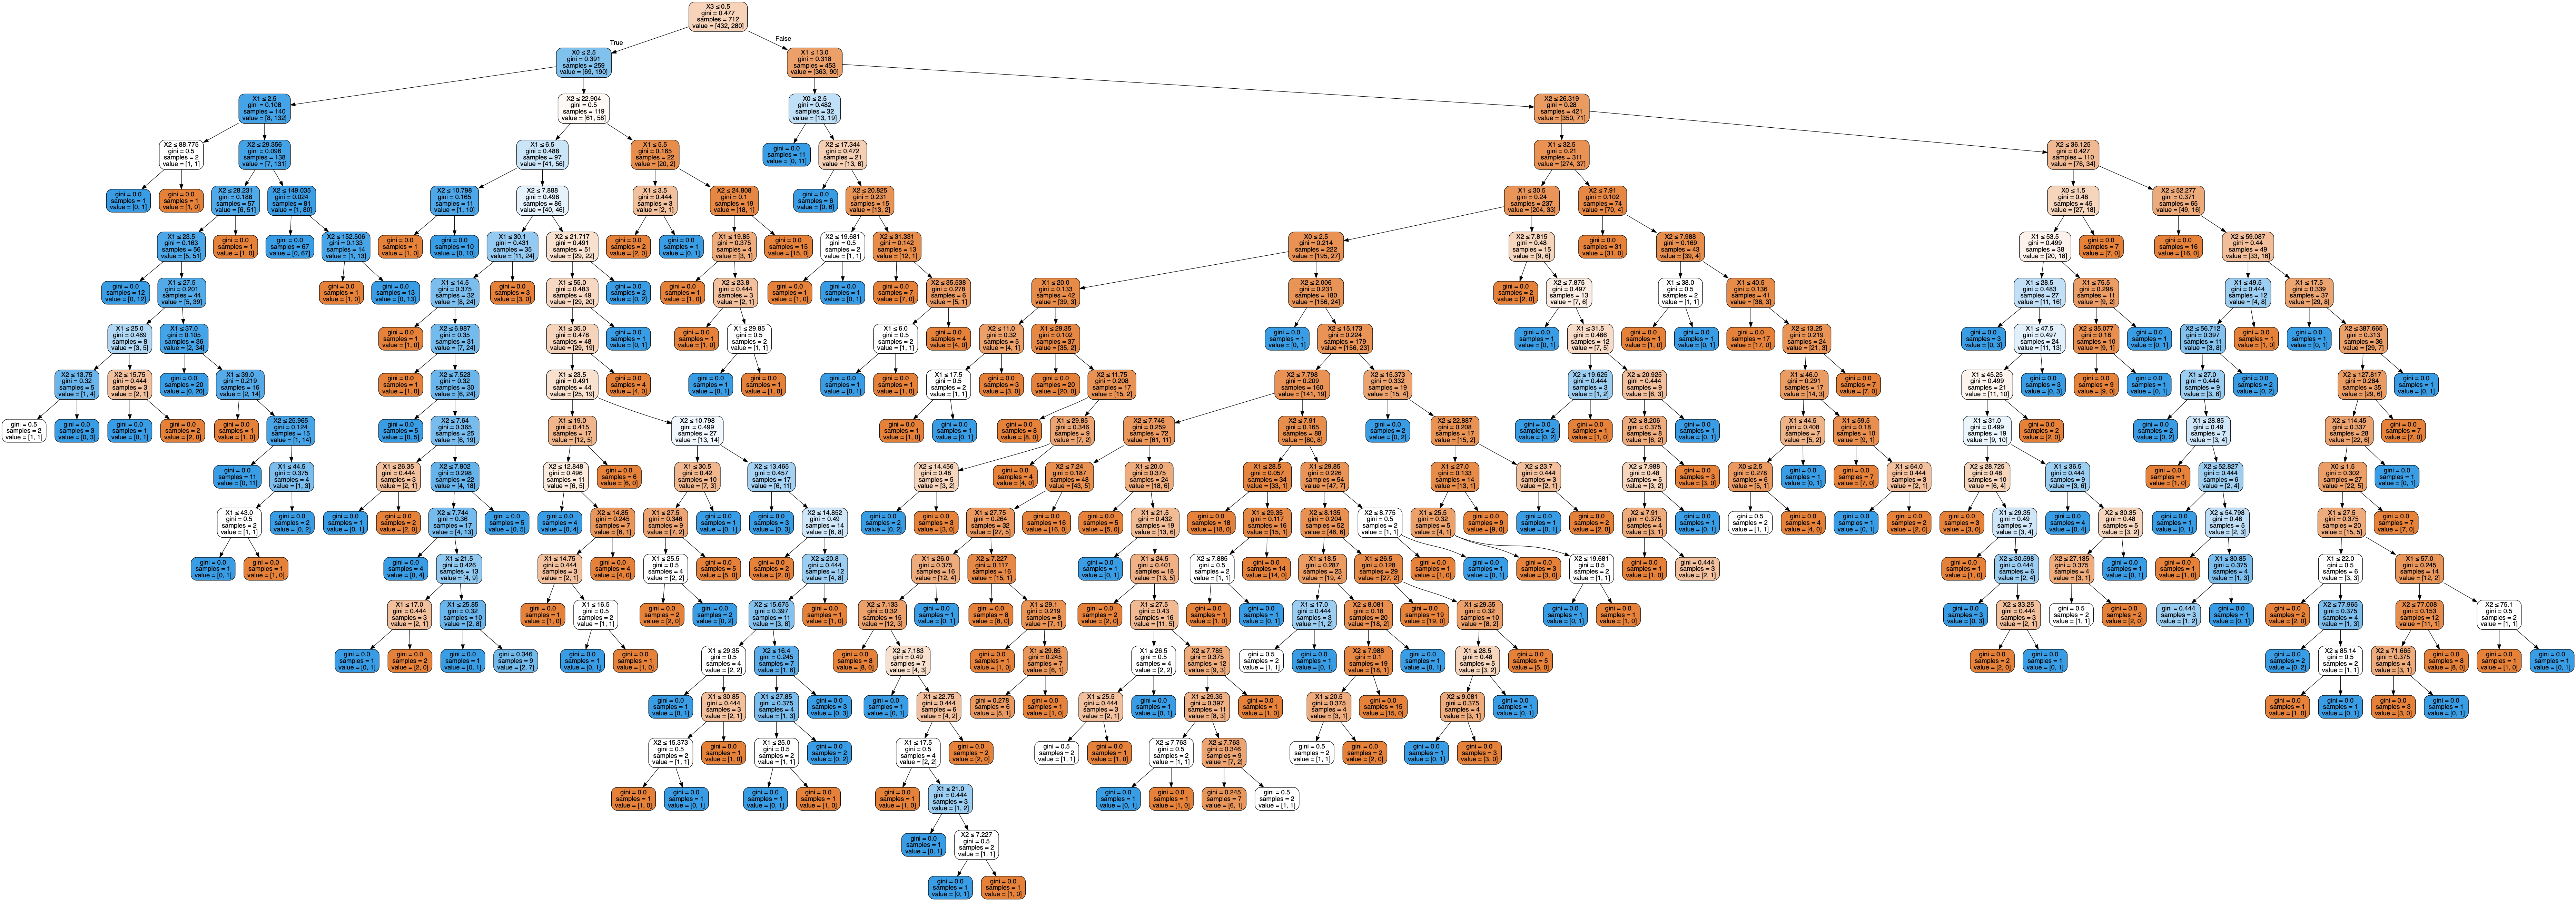

In [98]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())